In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

# Подготовка данных

In [2]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.shape
df = df.drop(df.columns[list(range(20, 29))], axis=1)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3


Замена пропусков дохода (Income) медианным значением

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())

Замена выпадающих значений у Marital_Status: Alone, Absurd, YOLO на такое же по смыслу Single

In [9]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

По болонской системе степеней образования циклу Second cycle соответствует Master degree, опэтому необходимо заменить 2n Cycle на Master

In [11]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
df['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

Добавление колонки Age на основе года рождения, для удобства восприятия данных

In [13]:
df.insert(2, 'Age', 2023 - df['Year_Birth'])
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,66,Graduation,Single,58138.0,0,0,04-09-2012,58,...,88,546,172,88,88,3,8,10,4,7
1,2174,1954,69,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,6,2,1,6,2,1,1,2,5
2,4141,1965,58,Graduation,Together,71613.0,0,0,21-08-2013,26,...,49,127,111,21,42,1,8,2,10,4
3,6182,1984,39,Graduation,Together,26646.0,1,0,10-02-2014,26,...,4,20,10,3,5,2,2,0,4,6
4,5324,1981,42,PhD,Married,58293.0,1,0,19-01-2014,94,...,43,118,46,27,15,5,5,3,6,5


# Анализ

Обратим внимание на ряд числовых показателей:

*   `Age` - возраст покупателя
*   `Income` - годовой доход покупателя
*   `Recency` - количество дней, прошедшее с последней покупки
*   `NumWebPurchases` - количество покупок онлайн
*   `NumStorePurchases` - количество покупок непосредственно в магазине

Средний возраст `Age` - 54 года близок к медиане в 53 года. Аналогичные достаточно близкие совпадения прослеживаются и у остальных числовых показателей. Отдельно необходимо проверить показатели на нормальность.

Кроме того, максимальное значение возраста - 130 лет указывает на наличие некорректных данных среди покупателей

In [14]:
df.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,54.194196,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,27.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,46.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,53.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,64.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,130.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [15]:
df[df['Age'] > 100]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
192,7829,1900,123,Master,Divorced,36640.0,1,0,26-09-2013,99,...,6,8,7,4,25,1,2,1,2,5
239,11004,1893,130,Master,Single,60182.0,0,1,17-05-2014,23,...,0,5,7,0,2,1,1,0,2,4
339,1150,1899,124,PhD,Together,83532.0,0,0,26-09-2013,36,...,144,562,104,64,224,1,4,6,4,1


In [16]:
df = df[df['Age'] <= 100]

# Проверка на нормальное распределение

## Визуальный анализ (гистограммы)

Видно, что `Recency` точно распределено не нормально, когда `Income` и `Age` потенциальные кандидаты на нормальное распределение. Интерпретация `NumWebPurchases` и `NumStorePurchases` тоже неоднозначна

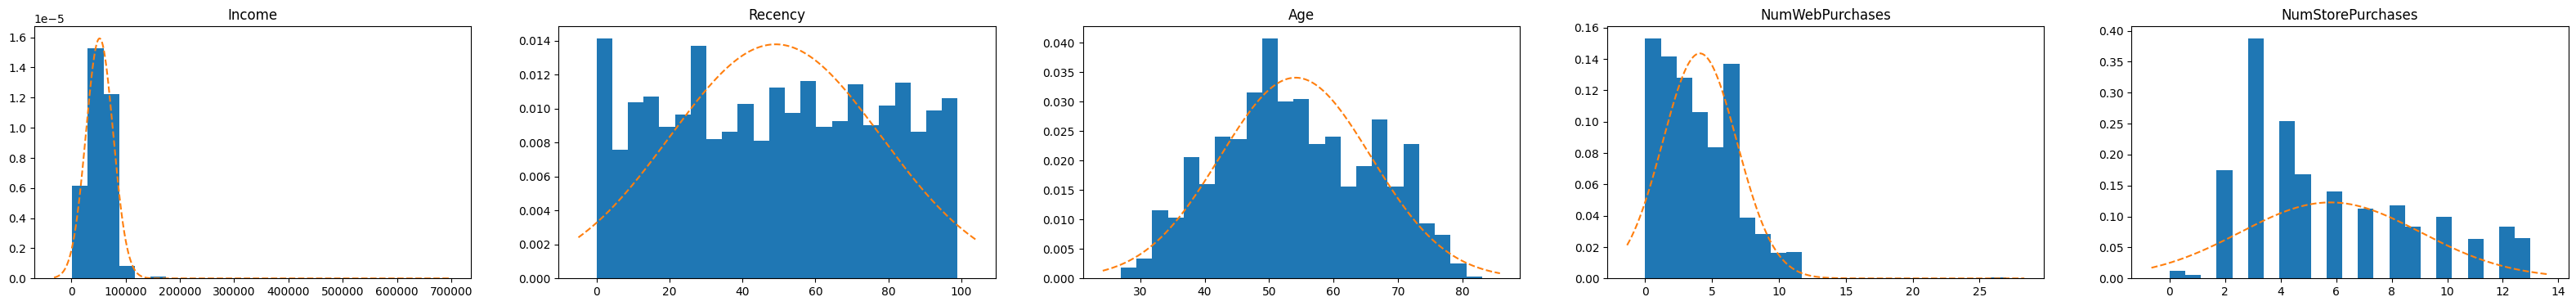

In [17]:
keys = ['Income', 'Recency', 'Age', 'NumWebPurchases', 'NumStorePurchases']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

In [18]:
df[df['NumStorePurchases'] == 3]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
11,387,1976,47,Basic,Married,7500.0,0,0,13-11-2012,59,...,16,11,11,1,16,1,2,0,3,8
14,2569,1987,36,Graduation,Married,17323.0,0,0,10-10-2012,38,...,14,17,6,1,5,1,1,0,3,8
16,9736,1980,43,Graduation,Married,41850.0,1,1,24-12-2012,51,...,5,19,2,13,4,3,3,0,3,8
19,2278,1985,38,Master,Single,33812.0,1,0,03-11-2012,86,...,17,19,30,24,39,2,2,1,3,6
25,7892,1969,54,Graduation,Single,18589.0,0,0,02-01-2013,89,...,4,25,15,12,13,2,2,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3850,1963,60,Basic,Together,14918.0,0,1,07-12-2012,52,...,3,3,15,4,15,1,1,0,3,6
2212,6983,1950,73,Master,Divorced,38054.0,1,1,01-05-2014,24,...,2,17,2,1,0,2,2,0,3,7
2216,736,1983,40,Graduation,Together,28427.0,1,0,21-03-2013,67,...,3,19,3,3,6,2,2,0,3,8
2232,8080,1986,37,Graduation,Single,26816.0,0,0,17-08-2012,50,...,1,6,3,4,3,1,0,0,3,4


In [19]:
df['NumStorePurchases'].value_counts()

3     490
4     322
2     221
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64

## Визуальный анализ (квантили)

Построим Q-Q кривую. Чем ближке график к графику $y=x$, тем более нормальным является распределение значений выборки. 

Из графиков кривой можно подтвердить ненормальное распределение `Recency`, хвосты сильно отличаются от графика $y=x$, когда `Income` и `Age` распределены относительно нормально. `NumWebPurchases` и `NumStorePurchases` не могут быть отрицательными, за исключением этого, распределены относительно нормально. 

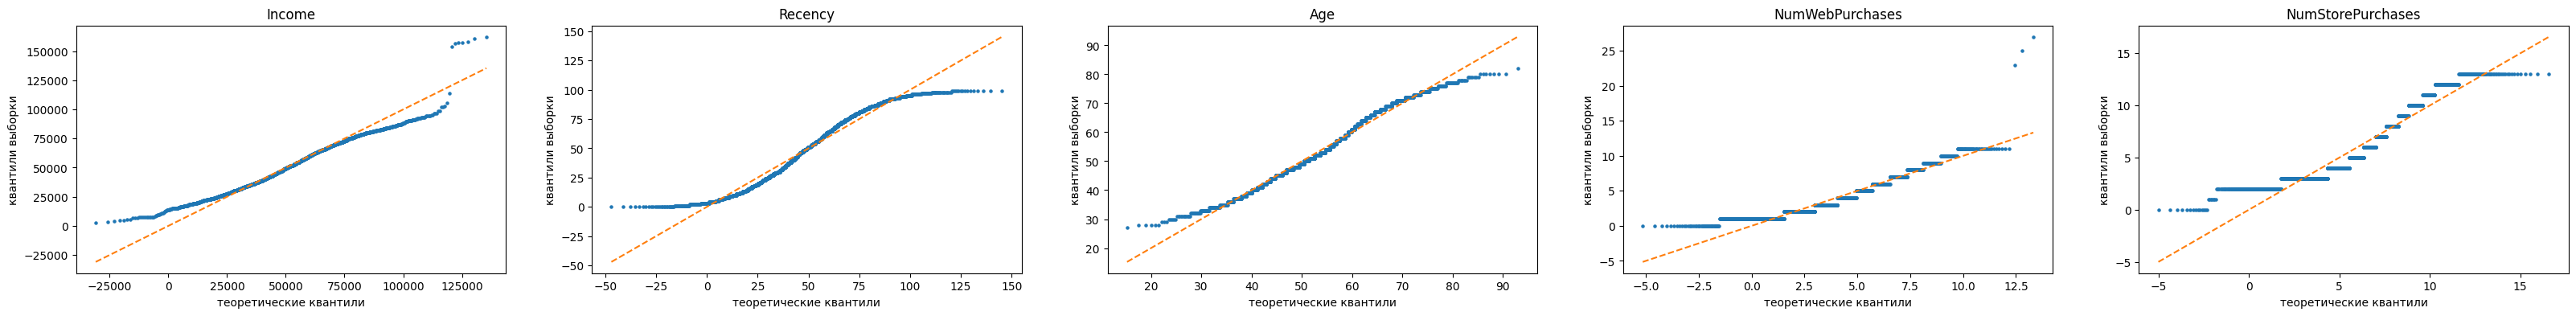

In [20]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

## Статистические показатели

Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Для `Income` и `Age`рассчётные цифры оказываются близки к теоретическим, поэтому распределения можно признать нормальными. 

Кроме того распределение `Age` ближе к нормальному, чем распределение `Income`. 
Аналогично `NumWebPurchases` ближе, чем `NumStorePurchases`к нормальному, что также видно по qq-кривой


In [21]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Income
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7340187751452839
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9946356727760394
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9964237818506929

Recency
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.5797943674564149
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6209208761734466
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9825659365221279
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

NumWebPurchases
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6312025033527046
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9593205185516317
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9982118909253465

NumStorePurchases
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7152436298614215
2 sigma(s)
	theoretical:	0.954499736103

# Регрессия между возрастом и доходом, есть ли?

## Визуализация

Исходя из визуализации уже можно сделать вывод, что регрессия между доходом и возрастом отсутствует

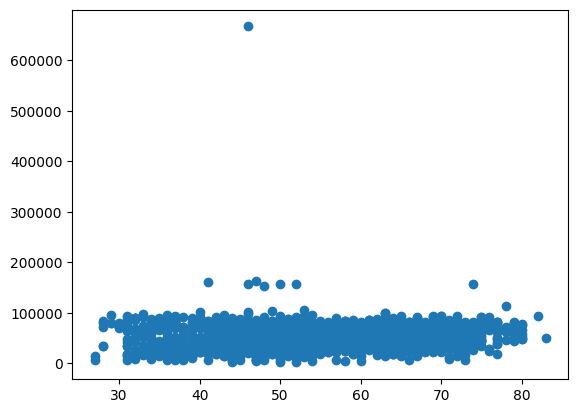

In [22]:
plt.scatter(df['Age'], df['Income'])
plt.show()

In [23]:
df[df['Income'] > 600000]

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2233,9432,1977,46,Graduation,Together,666666.0,1,0,02-06-2013,23,...,14,18,8,1,12,4,3,1,3,6


In [24]:
b1 = np.cov(df['Income'], df['Age'], ddof=1)[0, 1] / np.var(df['Income'], ddof=1)
b0 = df['Age'].mean() - b1 * df['Income'].mean()

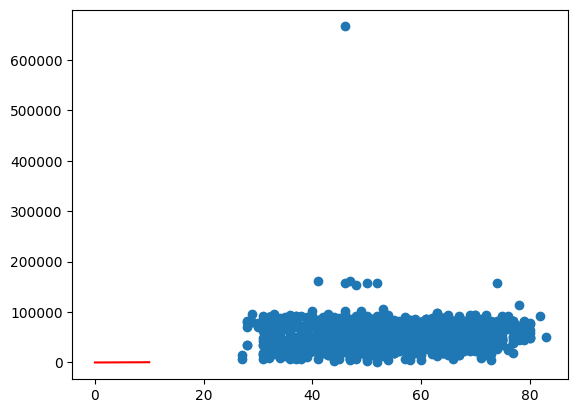

In [25]:
plt.scatter(df['Age'], df['Income'])
x = np.linspace(0, 10, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
x = np.array(df['Age'].tolist()).reshape((-1, 1))
y = df['Income'].tolist()

In [29]:
model.fit(x, y)

LinearRegression()

In [30]:
y_pred = model.predict(x)

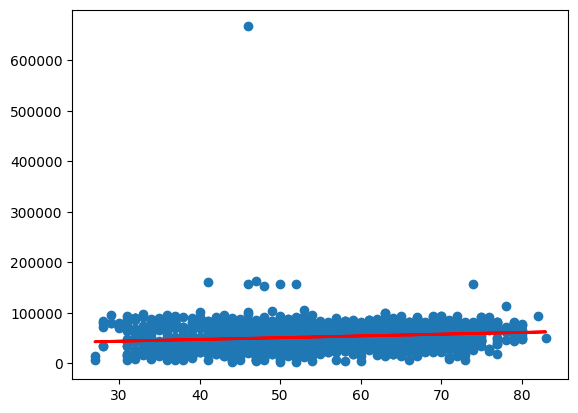

In [31]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

In [32]:
w1 = model.coef_
w1

array([347.43756861])

In [33]:
w0 = model.intercept_
w0

33431.6098890506

In [34]:
w1 / 666666

array([0.00052116])

In [35]:
data = df.loc[df['Income'] < 600000]

In [65]:
x2 = np.array(data['Age'].tolist()).reshape((-1, 1))
y2 = data['Income'].tolist()
model.fit(x2, y2)
y_pred2 = model.predict(x2)

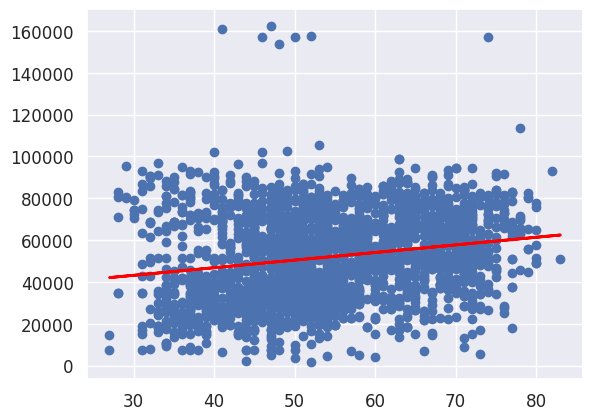

In [66]:
plt.scatter(x2, y2)
plt.plot(x2, y_pred2, color='red', linewidth=2);
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
print('Mean Absolute Error:', mean_absolute_error(y2, y_pred2))
print('Mean Squared Error:', mean_squared_error(y2, y_pred2))
print('R2 score:', r2_score(y2, y_pred2))

Mean Absolute Error: 17152.679678228596
Mean Squared Error: 440128952.35260296
R2 score: 0.039535387829801594


#Верно ли, что люди с большим заработков приобретают больше товаров из золота?

Действительно, присутсвует зависимость между доходом и приобретенными товарами из золота. Как и ожидалось, чем больше доход, тем больше товаров из золота приобретают покупатели.

In [41]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [42]:
gold_mean = df['MntGoldProds'].median()
df1 = df[df['MntGoldProds'] <= gold_mean]
df2 = df[df['MntGoldProds'] > gold_mean]

In [43]:
var_analise(df, df1, df2, 'Income')

True

In [44]:
res1_mean = df1['Income'].mean()
res2_mean = df2['Income'].mean()

print(f'Малые траты на золото: {res1_mean}, большие траты на золото {res2_mean}')

Малые траты на золото: 43442.0124666073, большие траты на золото 61083.780071813286


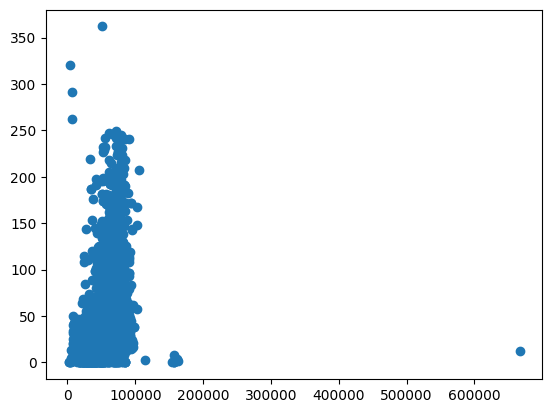

In [45]:
plt.scatter(df['Income'], df['MntGoldProds'],)
plt.show()

#Верно ли, что женатые пары с детьми приобретают больше товаров онлайн? 

Можно было предположить, что у женатых пар с детьми меньше времени на посещение магазина, поэтому именно они приобретают больше онлайн. Но такая зависимость отсуствует

In [46]:
df3 = df[((df['Kidhome'] > 0) | (df['Teenhome'] > 0)) & (df['Marital_Status'] == 'Married')]
df4 = df[((df['Kidhome'] == 0) & (df['Teenhome'] == 0)) | (df['Marital_Status'] != 'Married')]

In [47]:
var_analise(df, df3, df4, 'NumWebPurchases')

False

In [48]:
res1_mean = df3['NumWebPurchases'].mean()
res2_mean = df4['NumWebPurchases'].mean()

print(f'Женатые пары с детьми: {res1_mean}, все остальные {res2_mean}')

Женатые пары с детьми: 4.039432176656152, все остальные 4.106051154086089


#Верно ли, что люди с детьми приобретают больше товаров онлайн? 

Ослабив условия на покупатей, проверим, есть ли зависимость между покупками онлайн и наличием у покупателей детей, исходя из той же логики нехватки времени. 

Зависимоть присутсвует, но при этом покупатели с детьми делают онлайн меньше покупок, чем покупатели без детей. 

Проверим далее, может покупателям с детьми удобнее делать покупки непосредственно в магазине

In [49]:
df5 = df[(df['Kidhome'] > 0) | (df['Teenhome'] > 0)]
df6 = df[(df['Kidhome'] == 0) & (df['Teenhome'] == 0)]

In [50]:
var_analise(df, df5, df6, 'NumWebPurchases')

True

In [51]:
res1_mean = df5['NumWebPurchases'].mean()
res2_mean = df6['NumWebPurchases'].mean()

print(f'Люди с детьми: {res1_mean}, люди без детей {res2_mean}')

Люди с детьми: 3.965, люди без детей 4.39403453689168


#Верно ли, что люди с детьми приобретают больше товаров очно? 

Получается аналогичная ситуация. Из последних двух оценок можно сделать вывод, что в данном магазине, покупатели с детьми в принципе совершают меньше покупок.

In [52]:
var_analise(df, df5, df6, 'NumStorePurchases')

True

In [53]:
res1_mean = df5['NumStorePurchases'].mean()
res2_mean = df6['NumStorePurchases'].mean()

print(f'Люди с детьми: {res1_mean}, люди без детей {res2_mean}')

Люди с детьми: 5.206875, люди без детей 7.270015698587128


#Действительно ли одинокие люди делают больше очных покупок?

Согласно оценке зависимость между статусом в отношениях и количеством покупок в магазине отсутсвует

In [54]:
df7 = df[(df['Marital_Status'] != 'Married') & (df['Marital_Status'] != 'Together')]
df8 = df[(df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together')]

In [55]:
var_analise(df, df7, df8, 'NumStorePurchases')

False

In [56]:
res1_mean = df7['NumStorePurchases'].mean()
res2_mean = df8['NumStorePurchases'].mean()

print(f'Одинокие люди: {res1_mean}, люди в браке или отношениях {res2_mean}')

Одинокие люди: 5.773299748110831, люди в браке или отношениях 5.805959805959806


#Зависимости c приобретенными товарами по категориям

По матрице корреляции видна вполне логичная зависимость приобретенных товаров разных типов от дохода. При чем зависимость прямая и линейная, и как мы убедились ранее на золоте: чем больше доход у покупателя, тем больше покупок он совершает

Отдельно проведём дисперсионный анализ для всех пар типов купленных продуктов, посмотрев влияние типа продукта на количество очных покупок. На графике видно, что точки распределены по всему графику, а также преобладают красные точки. Из чего можно сделать вывод, что тип продукта влияет на совершенные очные покупки в магазине.

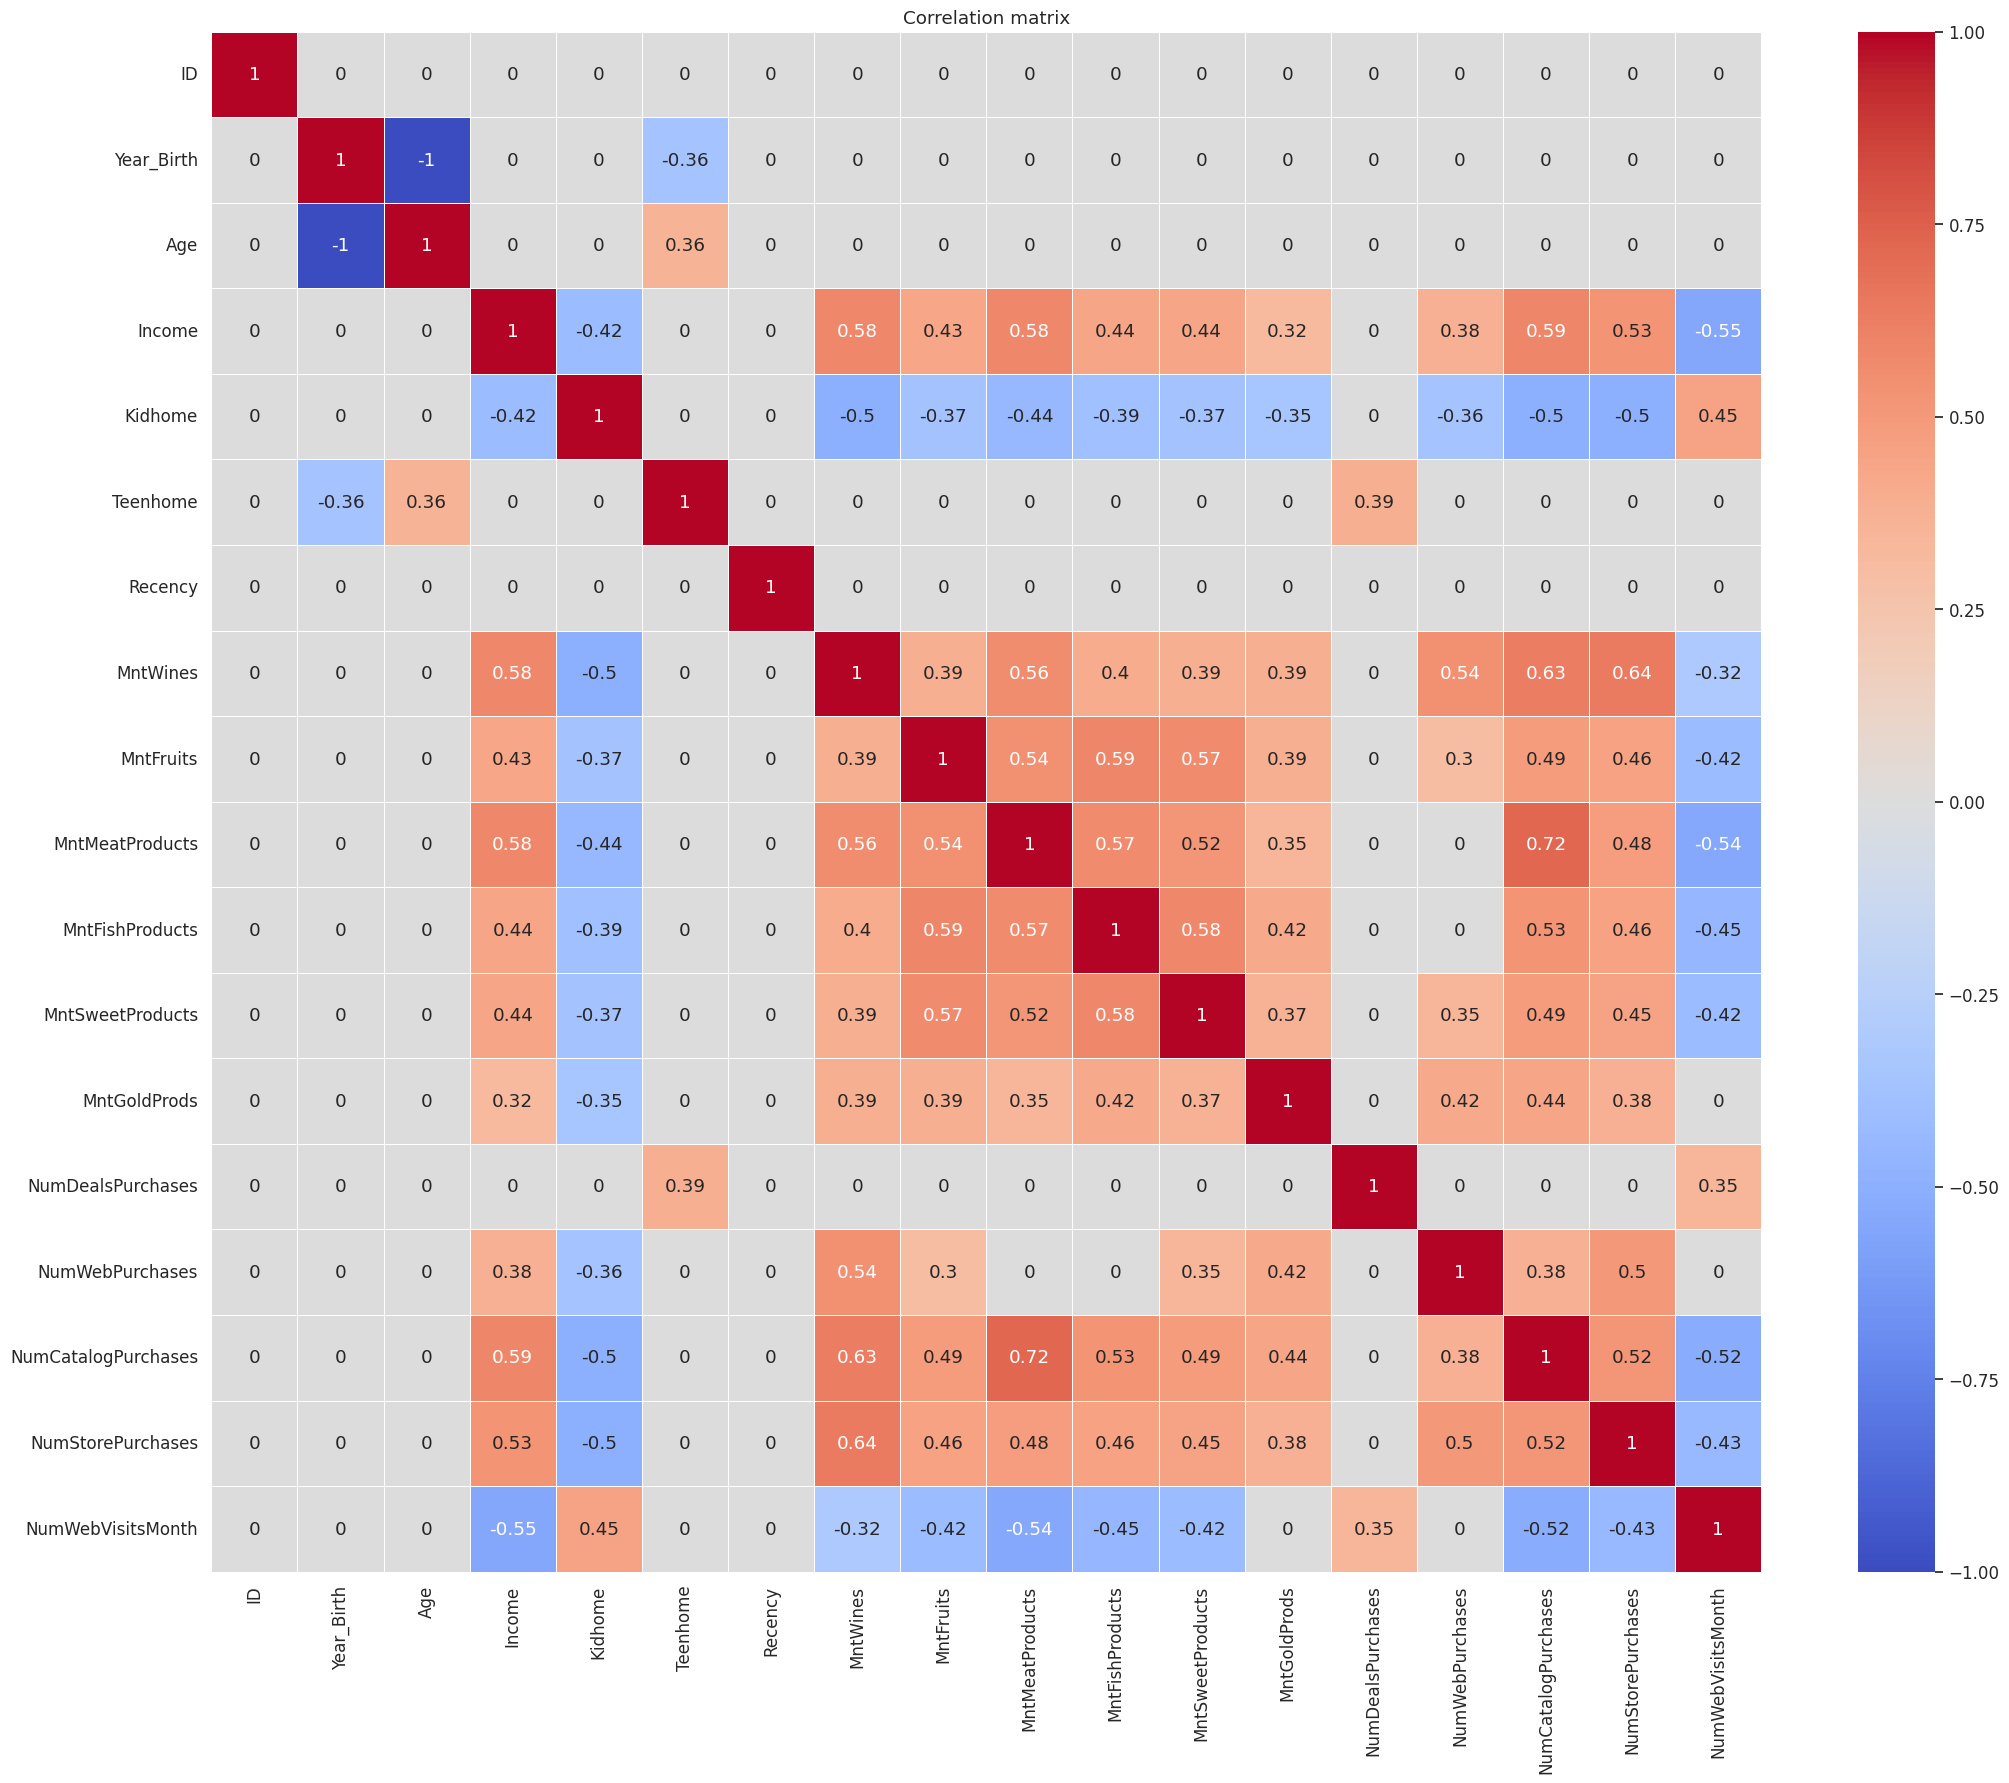

In [57]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [58]:
list_products = df.columns[10:16]

In [59]:
list_products

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [60]:
list_of_res = []
for i in combinations(list_products, 2):
  #print(i)
  dict = {}
  dict['g1'] = i[0]
  dict['g2'] = i[1]
  wdf = df[[i[0], i[1], 'NumStorePurchases']]
  wdf = wdf.loc[ (wdf[i[0]]==1) | (wdf[i[1]]==1) ]
  wdf1 = wdf[wdf[i[0]]==1]
  wdf2 = wdf[wdf[i[1]]==1]
  
  dict['va'] = var_analise(wdf, wdf1, wdf2, 'NumStorePurchases')
  dict['g1_mean'] = wdf1['NumStorePurchases'].mean()
  dict['g2_mean'] = wdf2['NumStorePurchases'].mean()
  list_of_res.append(dict)

In [61]:
wdf1

,MntSweetProducts,MntGoldProds,NumStorePurchases
1,1,6,2
7,1,23,4
9,1,13,0
11,1,16,3
14,1,5,3
...,...,...,...
2164,1,13,3
2212,1,0,3
2230,1,23,2
2233,1,12,3


In [62]:
wdf2

,MntSweetProducts,MntGoldProds,NumStorePurchases
10,2,1,2
21,1,1,0
75,1,1,2
91,0,1,2
164,2,1,0
...,...,...,...
2032,5,1,3
2095,0,1,3
2132,1,1,0
2150,1,1,3


In [63]:
resframe3 = pd.DataFrame(list_of_res)
resframe3[resframe3['va'] == False]

,g1,g2,va,g1_mean,g2_mean
4,MntWines,MntGoldProds,False,2.270270,2.410959
7,MntFruits,MntSweetProducts,False,2.783951,2.863354


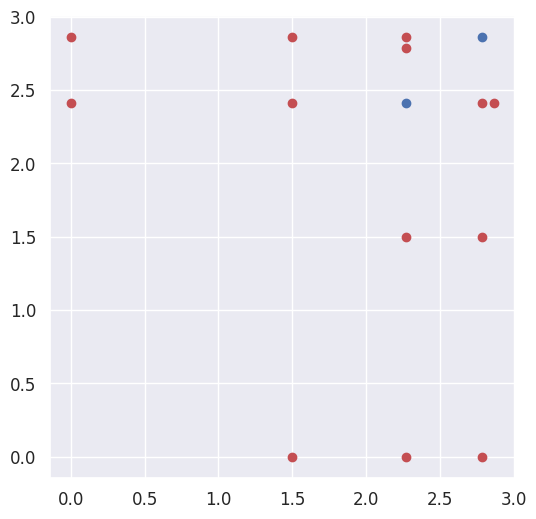

In [64]:
plt.figure(figsize = (6,6))

plt.scatter(resframe3.loc[resframe3['va'] == True, 'g1_mean'], resframe3.loc[resframe3['va'] == True, 'g2_mean'], color = 'r')
plt.scatter(resframe3.loc[resframe3['va'] == False, 'g1_mean'], resframe3.loc[resframe3['va'] == False, 'g2_mean'], color = 'b')

#Вывод

В данном магазине такие характреистики покупателей, как возраст и доход распределены относительно нормально; то же самое можно сказать о количестве покупок очно в магазине и онлайн на сайте магазина. 

Анализ показал, логичную и ожидаемую зависимость приобретенных товаров от дохода.

Однако, не все предположения о зависимостях разных параметров с количеством покупок подтвердились. 
* Покупатели с детьми не совершают больше покупок как онлайн, так и очно, чем покупатели без детей. Хоть зависимость и присутствует, выяснилось, на обоих каналах сбыта преобладают покупатели без детей.

* Связь между наличием у покупателя отношений так же не влияет на количество совершенных им покупок.

Из дисперсионного анализа видно, что тип продукта влияет на совершение очной покупки. Это может обуславливаться естественным желанием покупателя вживую оценить определенные товары.